# Visualizing Strogatz ODE Trajectories

This notebook visualizes the simulated trajectories from the 7 ODE systems with noise level 0.02.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)

## Load Data

Load the simulated trajectories from CSV files.

In [2]:
# Data directory
data_dir = "../../data/strogatz-ode/noise0.02"

# Define system names and file prefixes
systems = [
    {'name': 'Bacterial Respiration', 'prefix': 'bacres', 'n_traj': 4},
    {'name': 'Bar Magnets', 'prefix': 'barmag', 'n_traj': 4},
    {'name': 'Glider', 'prefix': 'glider', 'n_traj': 4},
    {'name': 'Lotka-Volterra', 'prefix': 'lotkavolterra', 'n_traj': 4},
    {'name': 'Predator-Prey', 'prefix': 'predprey', 'n_traj': 4},
    {'name': 'Shear Flow', 'prefix': 'shearflow', 'n_traj': 4},
    {'name': 'Van der Pol', 'prefix': 'vdp', 'n_traj': 4}
]

def load_system_data(prefix):
    """Load both datasets for a given system."""
    file1 = f"{data_dir}/{prefix}1.csv"
    file2 = f"{data_dir}/{prefix}2.csv"
    
    # Load data (skip header row)
    data1 = np.loadtxt(file1, delimiter=',', skiprows=1)
    data2 = np.loadtxt(file2, delimiter=',', skiprows=1)
    
    return data1, data2

# Load all data
system_data = {}
for system in systems:
    try:
        data1, data2 = load_system_data(system['prefix'])
        system_data[system['prefix']] = {'data1': data1, 'data2': data2}
        print(f"Loaded {system['name']}: {data1.shape[0]} points")
    except Exception as e:
        print(f"Error loading {system['name']}: {e}")

print(f"\nSuccessfully loaded {len(system_data)} systems")

Loaded Bacterial Respiration: 400 points
Loaded Bar Magnets: 400 points
Loaded Glider: 400 points
Loaded Lotka-Volterra: 400 points
Loaded Predator-Prey: 400 points
Loaded Shear Flow: 400 points
Loaded Van der Pol: 400 points

Successfully loaded 7 systems


## Visualize All Systems

Create phase space plots (x vs y) for all 7 ODE systems.

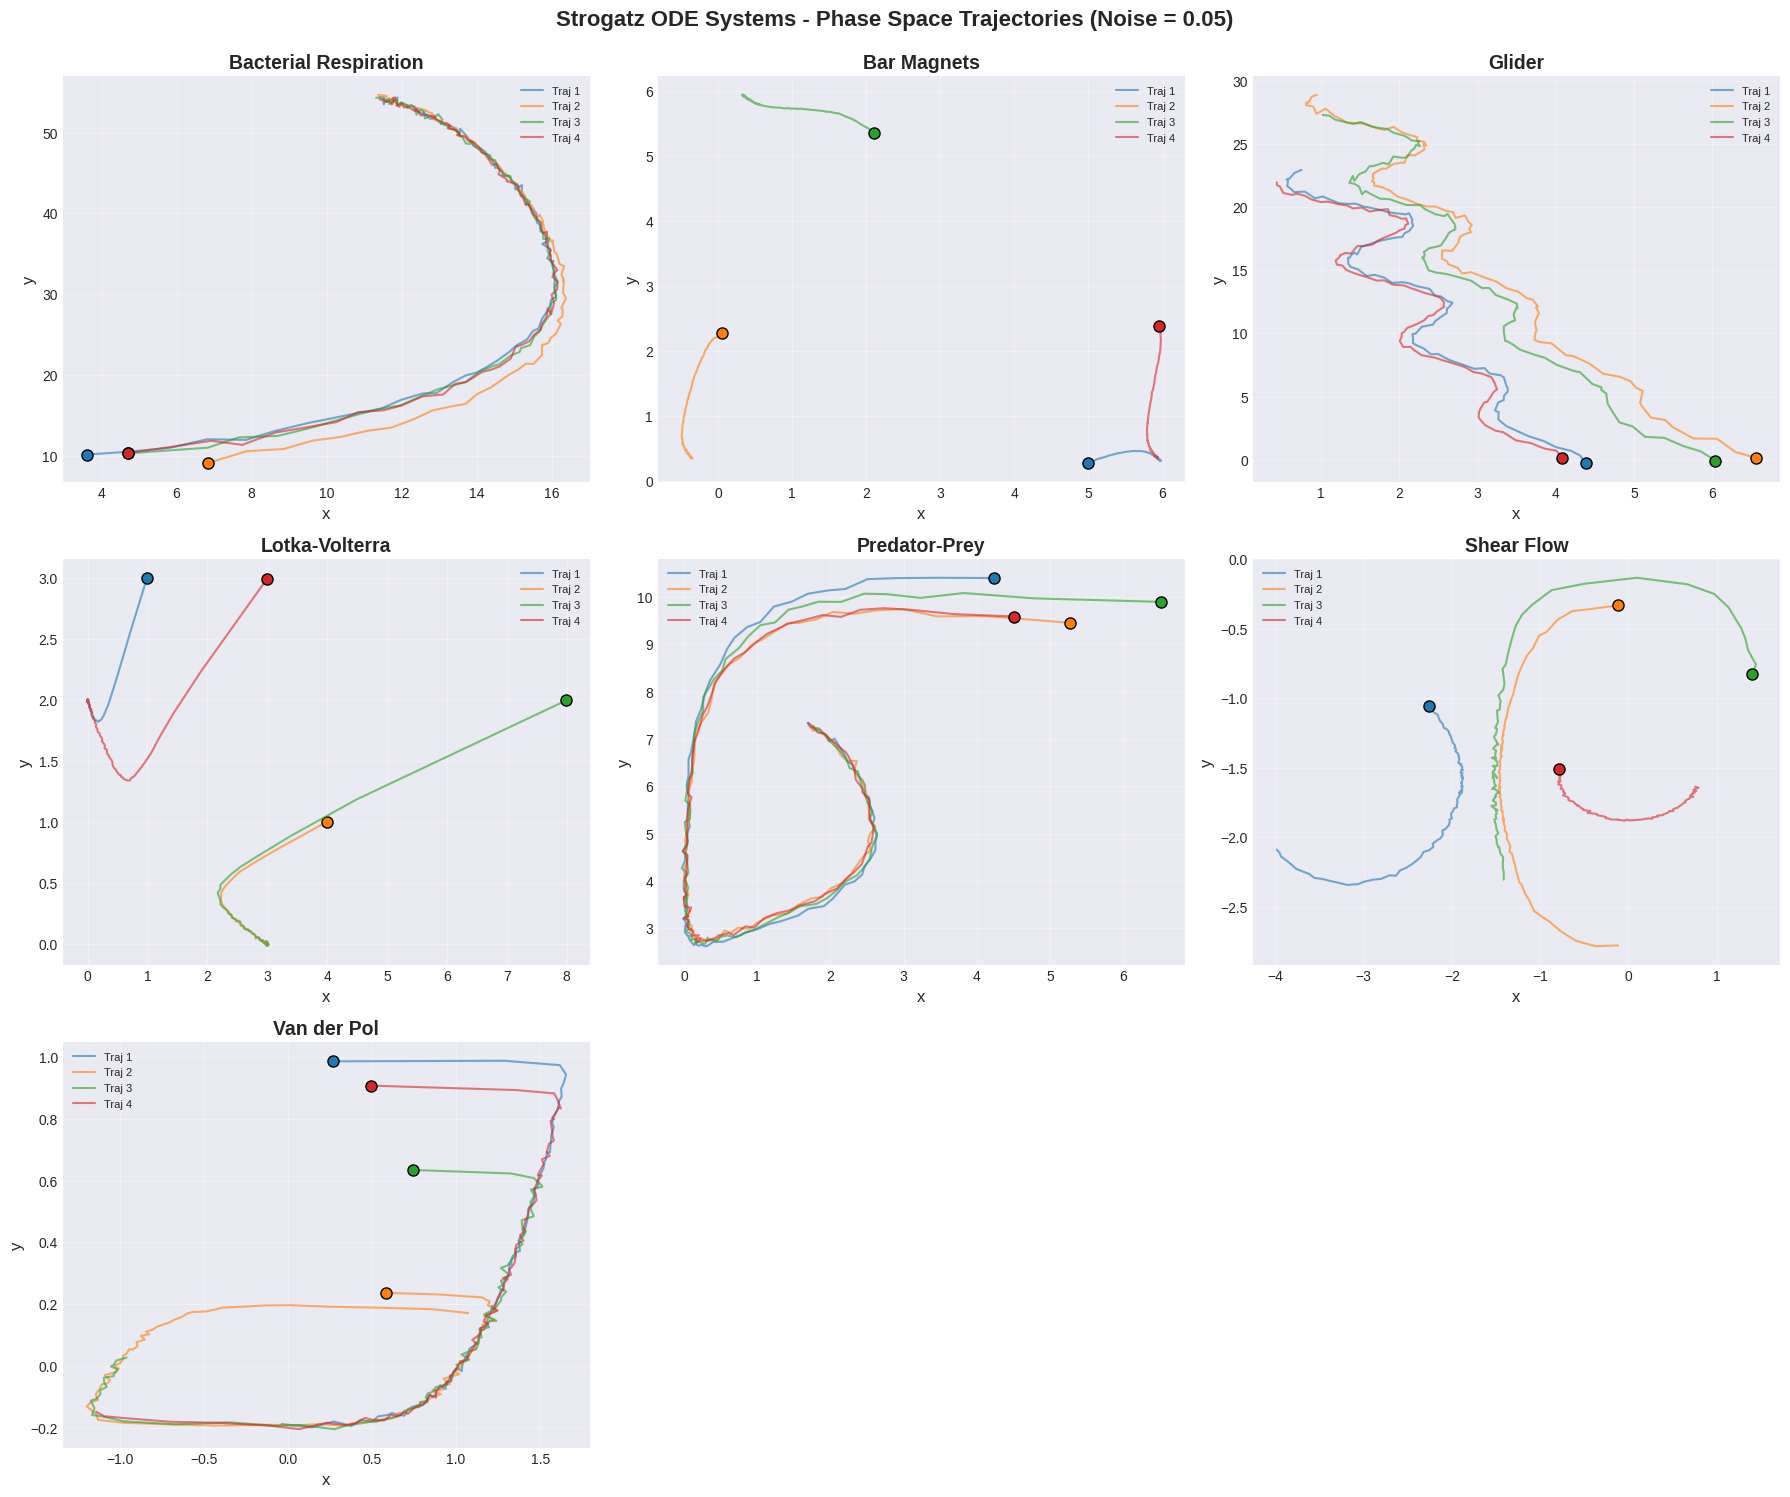

In [3]:
# Create a 3x3 grid of subplots (7 systems + 2 empty)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
n_points = 100  # Number of points per trajectory

for idx, system in enumerate(systems):
    ax = axes[idx]
    prefix = system['prefix']
    
    if prefix not in system_data:
        ax.set_visible(False)
        continue
    
    # Get data (using data1, columns: [dxdt, x, y])
    data = system_data[prefix]['data1']
    
    # Plot each trajectory
    n_traj = system['n_traj']
    for traj_idx in range(n_traj):
        start_idx = traj_idx * n_points
        end_idx = start_idx + n_points
        
        x = data[start_idx:end_idx, 1]  # x values
        y = data[start_idx:end_idx, 2]  # y values
        
        # Plot trajectory
        ax.plot(x, y, '-', color=colors[traj_idx], alpha=0.6, linewidth=1.5, label=f'Traj {traj_idx+1}')
        
        # Mark starting point
        ax.plot(x[0], y[0], 'o', color=colors[traj_idx], markersize=8, markeredgecolor='black', markeredgewidth=1)
    
    ax.set_title(system['name'], fontsize=14, fontweight='bold')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')

# Hide unused subplots
for idx in range(len(systems), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Strogatz ODE Systems - Phase Space Trajectories (Noise = 0.05)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Individual System Visualizations

Let's look at some systems in more detail.

### 1. Lotka-Volterra System

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prefix = 'lotkavolterra'
data = system_data[prefix]['data1']
n_points = 100
n_traj = 4

# Phase space plot
for traj_idx in range(n_traj):
    start_idx = traj_idx * n_points
    end_idx = start_idx + n_points
    
    x = data[start_idx:end_idx, 1]
    y = data[start_idx:end_idx, 2]
    
    ax1.plot(x, y, '-', linewidth=2, alpha=0.7, label=f'IC: ({x[0]:.1f}, {y[0]:.1f})')
    ax1.plot(x[0], y[0], 'o', markersize=10, markeredgecolor='black', markeredgewidth=2)
    ax1.plot(x[-1], y[-1], 's', markersize=8, markeredgecolor='black', markeredgewidth=2)

ax1.set_xlabel('x (Prey)', fontsize=14)
ax1.set_ylabel('y (Predator)', fontsize=14)
ax1.set_title('Lotka-Volterra Phase Space', fontsize=16, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Time series plot for one trajectory
traj_idx = 0
start_idx = traj_idx * n_points
end_idx = start_idx + n_points
x = data[start_idx:end_idx, 1]
y = data[start_idx:end_idx, 2]
t = np.arange(0, 10, 0.1)[:n_points]

ax2.plot(t, x, '-', linewidth=2, label='x (Prey)', color='#1f77b4')
ax2.plot(t, y, '-', linewidth=2, label='y (Predator)', color='#ff7f0e')
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Population', fontsize=14)
ax2.set_title('Time Series (First Trajectory)', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2. Van der Pol Oscillator

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prefix = 'vdp'
data = system_data[prefix]['data1']
n_points = 100
n_traj = 4

# Phase space plot
for traj_idx in range(n_traj):
    start_idx = traj_idx * n_points
    end_idx = start_idx + n_points
    
    x = data[start_idx:end_idx, 1]
    y = data[start_idx:end_idx, 2]
    
    ax1.plot(x, y, '-', linewidth=2, alpha=0.7, label=f'Traj {traj_idx+1}')
    ax1.plot(x[0], y[0], 'o', markersize=10, markeredgecolor='black', markeredgewidth=2)

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_title('Van der Pol Phase Space', fontsize=16, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Time series plot
traj_idx = 0
start_idx = traj_idx * n_points
end_idx = start_idx + n_points
x = data[start_idx:end_idx, 1]
y = data[start_idx:end_idx, 2]
t = np.arange(0, 10, 0.1)[:n_points]

ax2.plot(t, x, '-', linewidth=2, label='x', color='#1f77b4')
ax2.plot(t, y, '-', linewidth=2, label='y', color='#ff7f0e')
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('State', fontsize=14)
ax2.set_title('Time Series (First Trajectory)', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3. Predator-Prey System

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prefix = 'predprey'
data = system_data[prefix]['data1']
n_points = 100
n_traj = 4

# Phase space plot
for traj_idx in range(n_traj):
    start_idx = traj_idx * n_points
    end_idx = start_idx + n_points
    
    x = data[start_idx:end_idx, 1]
    y = data[start_idx:end_idx, 2]
    
    ax1.plot(x, y, '-', linewidth=2, alpha=0.7, label=f'Traj {traj_idx+1}')
    ax1.plot(x[0], y[0], 'o', markersize=10, markeredgecolor='black', markeredgewidth=2)

ax1.set_xlabel('x (Prey)', fontsize=14)
ax1.set_ylabel('y (Predator)', fontsize=14)
ax1.set_title('Predator-Prey Phase Space', fontsize=16, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Time series plot
traj_idx = 0
start_idx = traj_idx * n_points
end_idx = start_idx + n_points
x = data[start_idx:end_idx, 1]
y = data[start_idx:end_idx, 2]
t = np.arange(0, 10, 0.1)[:n_points]

ax2.plot(t, x, '-', linewidth=2, label='x (Prey)', color='#1f77b4')
ax2.plot(t, y, '-', linewidth=2, label='y (Predator)', color='#ff7f0e')
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Population', fontsize=14)
ax2.set_title('Time Series (First Trajectory)', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4. Bar Magnets System

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

prefix = 'barmag'
data = system_data[prefix]['data1']
n_points = 100
n_traj = 4

# Phase space plot
for traj_idx in range(n_traj):
    start_idx = traj_idx * n_points
    end_idx = start_idx + n_points
    
    x = data[start_idx:end_idx, 1]
    y = data[start_idx:end_idx, 2]
    
    ax.plot(x, y, '-', linewidth=2, alpha=0.7, label=f'Traj {traj_idx+1}')
    ax.plot(x[0], y[0], 'o', markersize=10, markeredgecolor='black', markeredgewidth=2)

ax.set_xlabel('θ₁ (radians)', fontsize=14)
ax.set_ylabel('θ₂ (radians)', fontsize=14)
ax.set_title('Bar Magnets Phase Space', fontsize=16, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()